# Graduates in California

by Numan Yilmaz, 18 July 2016

Thousands of students graduate from schools in California every year. The California Department of Education (CDE) has one of the largest student populations in the country. You can find more information about the CDE at http://www.cde.ca.gov. 

The CDE has a Data & Statistics section on their website. A variety of datasets have been shared for educators, researchers and the public from the early 90s to current. 

This projected uses the dataset for the 2014 academic year. The following questions will be answered:  

- What is the maximum, minimum and total number of graduates in that academic year?
- What is the mean and median number of graduates?
- How many male and female graduates are there? What is the range?
- What is the number of graduates by ethnicity?
- What is the relation between graduates and UC graduates? 

Initial dataset can be downloaded as a .txt file here: http://www.cde.ca.gov/ds/sd/sd/filesgrads.asp

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

# download our dependecies

%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

This code and CSS file is from Brandon Rhodes's lecture at PyCon 2015. https://www.youtube.com/watch?v=5JnMutdy6Fw. 
It allows you to differentiate the column and index from the dataframe and visualize the dataset.

# Information about the columns of the graduates file

### CDS_CODE
This 14-digit code is the official, unique identification of a school within California. The first two digits identify the county, the next five digits identify the school district, and the last seven digits identify the school.

### ETHNIC
This is a coded field for race/ethnic designation. The ethnic designations are coded as follows:
* Code 0 = Not reported
* Code 1 = American Indian or Alaska Native, Not Hispanic
* Code 2 = Asian, Not Hispanic
* Code 3 = Pacific Islander, Not Hispanic
* Code 4 = Filipino, Not Hispanic
* Code 5 = Hispanic or Latino
* Code 6 = African American, not Hispanic (formerly known as Black, not Hispanic)
* Code 7 = White, not Hispanic
* Code 9 = Two or More Races, Not Hispanic
(See Glossary for complete definitions of the ethnic groups.)

### GENDER
This field is a coded field identifying gender. The gender is coded as follows:
* M = Male
* F = Female

### GRADS
Number of twelfth-grade graduates. This data includes summer graduates and does not include students with high school equivalencies (i.e., General Educational Development (GED) test or California High School Proficiency Examination (CHSPE)).

### UC_GRADS
Number of twelfth-grade graduates who also completed all courses required for entry into the University of California (UC) and/or California State University (CSU) with a grade "C" or better. This data includes summer graduates and does not include students with high school equivalencies (i.e., GED or CHSPE).

### YEAR
Year of data.

After downloading necessary Python packages, now it is time to read the file from the local file on the computer. 

In [3]:
# assign dataframe to df
df = pd.read_table('filesgrads2014.txt', index_col = None)
df.head()

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170109835,2,M,12,1,1415
1,1100170109835,5,M,1,0,1415
2,1100170109835,6,F,3,0,1415
3,1100170109835,6,M,1,0,1415
4,1100170109835,5,F,7,1,1415


In [4]:
#get a general overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 6 columns):
CDS_CODE    21013 non-null int64
ETHNIC      21013 non-null int64
GENDER      21013 non-null object
GRADS       21013 non-null int64
UC_GRADS    21013 non-null int64
YEAR        21013 non-null int64
dtypes: int64(5), object(1)
memory usage: 985.1+ KB


There are 21,013 rows in our dataset. There is no need to delete or remove spaces, letters or missing data. The type of columns are also listed.

In [5]:
# another way to learn data types
df.dtypes

CDS_CODE     int64
ETHNIC       int64
GENDER      object
GRADS        int64
UC_GRADS     int64
YEAR         int64
dtype: object

In [6]:
# another way of getting the size of dataset
len(df['CDS_CODE'])

21013

How many schools are there in the dataset? 

In [7]:
len(df['CDS_CODE'].unique())

2490

Let's do some research on the GRADS column, which is the number of graduate students in California in the 2014-2015 academic year.

In [8]:
#For convenience, let's assign the output of this dataframe to a variable...
grad = df['GRADS']

In [9]:
# largest number of graduates
grad.max()

508

In [10]:
# smallest number of graduates
grad.min()

1

In [11]:
# display the result of the largest number of graduates, sorted by graduates' value.
df.sort_values(['GRADS'], ascending = False).head()

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
7022,19648731936749,5,F,508,221,1415
4685,19644511932441,5,F,430,218,1415
7021,19648731936749,5,M,422,138,1415
4686,19644511932441,5,M,422,135,1415
4701,19644511939164,5,F,385,206,1415


In [12]:
## total graduated students in the academic year of 2014-2015
grad.sum()

426950

now let's add UC_GRADS columns to our dataframe and apply function to see multiple columns

In [13]:
df[['GRADS', 'UC_GRADS']].apply(sum)

GRADS       426950
UC_GRADS    185179
dtype: int64

OR

In [14]:
df[['GRADS', 'UC_GRADS']].sum()

GRADS       426950
UC_GRADS    185179
dtype: int64

In [15]:
# how many percent of graduate qualify to go to the UC.
(df['UC_GRADS'].sum() * 100 ) / df['GRADS'].sum()

43.372526056915326

In [16]:
# mean of grads column
grad.mean()

20.318374339694476

In [17]:
# median of grads column
grad.median()

5.0

The median is lower than the mean. This indicates that some of the schools had a very high number of graduates, pushing the value of the mean up.

In [18]:
# or just use describe() to get general info about the column
grad.describe()

count    21013.000000
mean        20.318374
std         39.613251
min          1.000000
25%          1.000000
50%          5.000000
75%         17.000000
max        508.000000
Name: GRADS, dtype: float64

Calculate the number of male graduates and assign them to a new variable called m  

In [19]:
m = df[df.GENDER == 'M']  
m = m.GRADS.sum()
m

210947

Calculate the number of female graduates and assign them to a new variable called f 

In [20]:
f = df[df.GENDER == 'F']  
f = f.GRADS.sum()
f

216003

Range of female and male student numbers

In [21]:
f - m 

5056

According to the dataset 5056 more female students graduated in the academic year of 2014.

We have previously seen the number of total graduates in the 2014 academic year. Let's confirm here.

In [22]:
f + m

426950

Now, lets focus on ethnics and graduates columns and do some math. 

In [23]:
#For convenience, let's assign the output of this dataframe to a new variable, df_ethnic

df_ethnic = df[['ETHNIC', 'GRADS']]
df_ethnic.head()

,ETHNIC,GRADS
0,2,12
1,5,1
2,6,3
3,6,1
4,5,7


Number of students whose ethnicity code is 2.

In [24]:
d = df_ethnic  
d = d[d['ETHNIC'] == 2]
d = d['GRADS'].sum()
d

41698

The value of etchicity codes are in  the dataset description. They are stored as integers. Let's create a function which assigns a value to each code. The function is called eth. 

In [25]:
def eth (value):
    if value == 0:
        return 'Not Reported'
    elif value == 1:
        return 'American Indian or Alaska Native, Not Hispanic'
    elif value == 2:
        return 'Asian, Not Hispanic'
    elif value == 3:
        return 'Pacific Islander, Not Hispanic'
    elif value == 4:
        return 'Filipino, Not Hispanic'
    elif value == 5:
        return 'Hispanic or Latino'
    elif value == 6:
        return 'African American, not Hispanic'
    elif value == 7:
        return 'White, not Hispanic'
    elif value == 9:
        return 'Two or More Races, Not Hispanic'
    else:
        return value

In [26]:
# test the funtion
eth(2)

'Asian, Not Hispanic'

In [27]:
# test the funtion one more time
eth(5)

'Hispanic or Latino'

In [28]:
#apply the funtion in all dataset and create a new column 

df_ethnic['ETHNIC_NAME'] = df_ethnic['ETHNIC'].apply(eth)
df_ethnic.head()

/anaconda/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,ETHNIC,GRADS,ETHNIC_NAME
0,2,12,"Asian, Not Hispanic"
1,5,1,Hispanic or Latino
2,6,3,"African American, not Hispanic"
3,6,1,"African American, not Hispanic"
4,5,7,Hispanic or Latino


In [29]:
# create a new variable called df_ethnicName

df_ethnicName = df_ethnic[['GRADS', 'ETHNIC_NAME']]
df_ethnicName.head()

,GRADS,ETHNIC_NAME
0,12,"Asian, Not Hispanic"
1,1,Hispanic or Latino
2,3,"African American, not Hispanic"
3,1,"African American, not Hispanic"
4,7,Hispanic or Latino


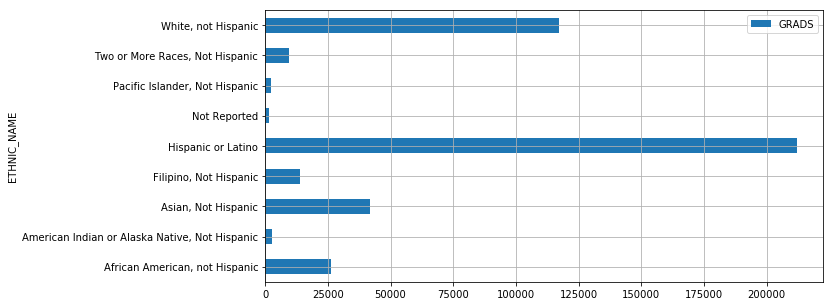

In [30]:
#plot the number of total graduates by ethnicity 

df_ethnicName.groupby(df_ethnicName['ETHNIC_NAME']).sum().plot(kind = 'barh', grid= True, figsize = (10,5))

Let's go back to our original dataaset

In [31]:
df.head()

,CDS_CODE,ETHNIC,GENDER,GRADS,UC_GRADS,YEAR
0,1100170109835,2,M,12,1,1415
1,1100170109835,5,M,1,0,1415
2,1100170109835,6,F,3,0,1415
3,1100170109835,6,M,1,0,1415
4,1100170109835,5,F,7,1,1415


Now, Let's see the relation between GRADS and UC_GRADS columns by scatter plotting. 

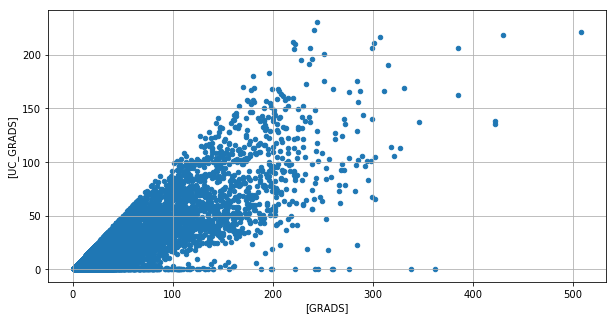

In [32]:
df.plot(x=['GRADS'], y=['UC_GRADS'], kind='scatter', grid=True, figsize = (10, 5))

As we have seen before from the mean and median, schools have different number of graduates. Graduate numbers between 0 and 150 and UC graduates number between 0 to 50 are high. There are some schools had zero UC grads. 

# Conclusion

Close to half million students graduated from in a California high school in the 2014-2015 academic year. There are more female gradutes then male graduates. Almost half of the students are eligible to continue their education in a California University. Hispanic or Latino ethnicity is dominant in the schools. There is a big variety in the number of graduates. Most schools had graduates between 0 and 120. 